In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-27 11:24:23.767730


<h1>Aikasarjojen kuvailua ja analysointia</h1>

Seuraavassa tarvitaan <b>pandas-datareader</b> -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen esimerkiksi seuraavasti:
<ul>
    <li>Käynnistä Anaconda Navigator ja valitse <b>Environments</b></li>
    <li>Jos <b>pandas-datareader</b> ei ole <b>Installed</b>-listassa, niin siirry <b>Not installed</b> -listaan</li>
    <li>Jos <b>pandas-datareader</b> ei löydy tästäkään listasta, niin päivitä lista (<b>Update index</b>)</li>
    <li>Valitse <b>pandas-datareader</b> ja napsauta alareunasta <b>Apply</b> ja seuraa asennuksen vaiheita.</li>
</ul>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Tätä tarvitaan datan noutamiseksi Yahoon-palvelusta
# Varmista, että pandas-datareader on asennettu
import pandas_datareader.data as web

# Grafiikan tulostaminen Jupyteriin
# Nykyisissä kirjastoversioissa ei enää tarpeellinen
%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

<h2>Datojen nouto</h2>

Elisan ja Telian kurssihistoriat voi noutaa Yahoo Finance -palvelusta. Voit googlata muiden osakkeiden nimiä. Esimerkiksi halulla 'yahoo finance kemira' löydät Kemiran nimen Yahoossa.

In [3]:
elisa = web.DataReader('ELISA.HE', start = '2015-1-1', data_source = 'yahoo')
telia = web.DataReader('TELIA1.HE', start = '2015-1-1', data_source = 'yahoo')

In [4]:
elisa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,22.870001,22.549999,22.610001,22.680000,206279.0,16.803354
2015-01-05,22.850000,22.309999,22.700001,22.400000,249378.0,16.595907
2015-01-07,23.139999,22.100000,22.500000,22.920000,531047.0,16.981171
2015-01-08,23.200001,22.760000,22.900000,22.830000,381383.0,16.914492
2015-01-09,23.120001,22.760000,22.809999,22.860001,305832.0,16.936716
...,...,...,...,...,...,...
2021-10-21,53.360001,52.240002,52.680000,52.520000,363018.0,52.520000
2021-10-22,53.520000,52.799999,53.240002,53.360001,263853.0,53.360001
2021-10-25,53.480000,52.820000,53.299999,53.060001,221163.0,53.060001


In [5]:
telia

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,5.360,5.2850,5.3400,5.3050,1039894.0,0.036511
2015-01-05,5.300,5.2050,5.2900,5.2050,929121.0,0.035822
2015-01-07,5.300,5.2200,5.2400,5.2450,860595.0,0.036098
2015-01-08,5.410,5.2600,5.2600,5.4050,1001285.0,0.037199
2015-01-09,5.420,5.2900,5.4000,5.2950,917754.0,0.036442
...,...,...,...,...,...,...
2021-10-21,3.625,3.5540,3.6250,3.5585,2062021.0,2.551710
2021-10-22,3.599,3.5235,3.5600,3.5880,3025283.0,2.572863
2021-10-25,3.593,3.5290,3.5915,3.5485,1664744.0,2.544539


<h2>Viivakaavioita</h2>

Text(0.5, 1.0, 'Elisan osakkeen hintakehitys vuodesta 2015')

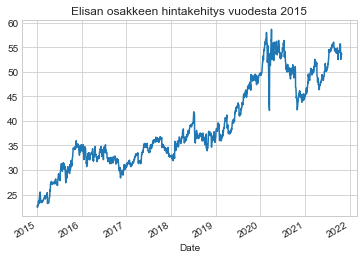

In [6]:
elisa['Close'].plot()
plt.title('Elisan osakkeen hintakehitys vuodesta 2015')

Text(0.5, 1.0, 'Telian osakkeen hintakehitys vuodesta 2015')

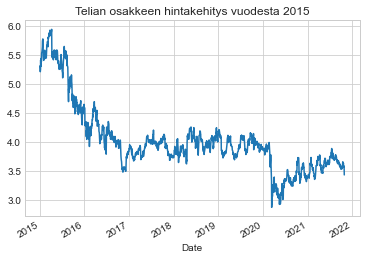

In [7]:
telia['Close'].plot()
plt.title('Telian osakkeen hintakehitys vuodesta 2015')

Text(0.5, 1.0, 'Elisan osakkeen hintakehitys vuoden 2021 alusta')

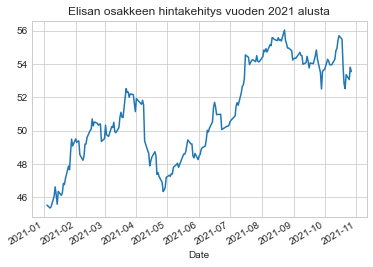

In [8]:
# Vuoden 2021 alusta
elisa['Close']['2021':].plot()
plt.title('Elisan osakkeen hintakehitys vuoden 2021 alusta')

Text(0.5, 1.0, 'Telian osakkeen hintakehitys vuoden 2021 alusta')

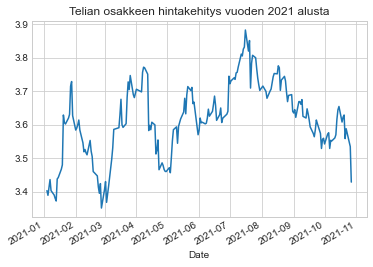

In [9]:
telia['Close']['2021':].plot()
plt.title('Telian osakkeen hintakehitys vuoden 2021 alusta')

<h2>Aggregointi</h2>

<b>resample()</b> aggregoi aikasarjan esimerkiksi päivätasolta kuukausitasolle.

resample()-toiminnon parametrina käytettäviä arvoja:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

Text(0.5, 1.0, 'Elisan osakkeen keskiarvohinnat kuukausittain')

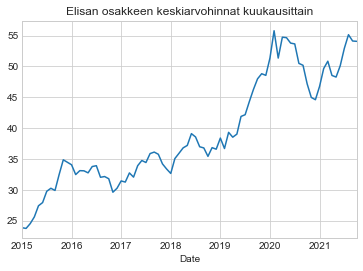

In [10]:
elisa['Close'].resample('M').mean().plot()
plt.title('Elisan osakkeen keskiarvohinnat kuukausittain')

Text(0.5, 1.0, 'Elisan osakkeen keskiarvohinnat vuosineljänneksittäin')

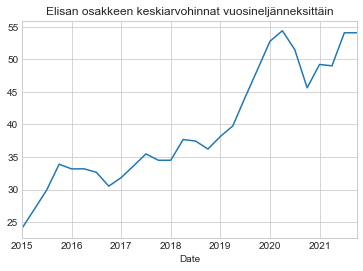

In [11]:
elisa['Close'].resample('Q').mean().plot()
plt.title('Elisan osakkeen keskiarvohinnat vuosineljänneksittäin')

Text(0.5, 1.0, 'Elisan osakkeen vuosittaiset keskiarvohinnat')

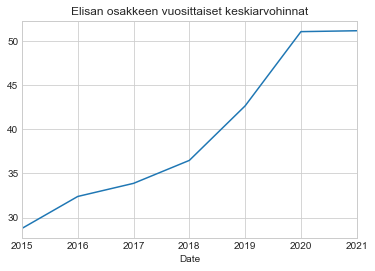

In [12]:
elisa['Close'].resample('Y').mean().plot()
plt.title('Elisan osakkeen vuosittaiset keskiarvohinnat')

Text(0.5, 1.0, 'Elisan osakkeen vaihto vuosineljänneksittäin')

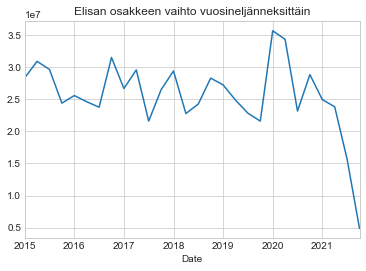

In [13]:
elisa['Volume'].resample('Q').sum().plot()
plt.title('Elisan osakkeen vaihto vuosineljänneksittäin')

<h2>Liukuvia keskiarvoja</h2>

Liukuvilla keskiarvoilla tasoitetaan satunnaisia piikkejä.

Teknisessä analyysissä aikasarjan ja liukuvien keskiarvojen leikkauskohtia käytetään osto- ja myyntisignaaleina.

Text(0.5, 1.0, 'Elisan 50 ja 200 päivän liukuvat keskiarvot')

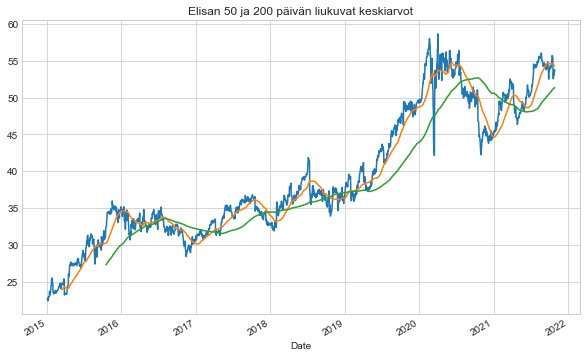

In [14]:
elisa['Close'].plot(figsize = (10, 6))

elisa['Close'].rolling(50).mean().plot()
elisa['Close'].rolling(200).mean().plot()

plt.title('Elisan 50 ja 200 päivän liukuvat keskiarvot')

<h2>Muutosprosentit</h2>

Muutosprosentit on kätevää laskea <b>pct_change()</b>-funktiolla. Tulos on desimaalimuodossa; tarvittaessa saan prosenttiluvut kertomalla luvulla 100.

In [15]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Close'].pct_change()
telia['Telia%'] = telia['Close'].pct_change()

In [16]:
# Yhdistän Elisan ja Telian muutosprosentit samaan tietokehikkoon (dataframe)
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis = 1)

# Jos päätöshinnoissa on puuttuvia arvoja (kauppaa ei ole käyty), niin muutosprosenteissakin on puuttuvia arvoja
# Ne voin korvata muutosprosentilla 0 käyttäen fillna-toimintoa
muutokset = muutokset.fillna(0)

Text(0, 0.5, 'Muutosprosentti')

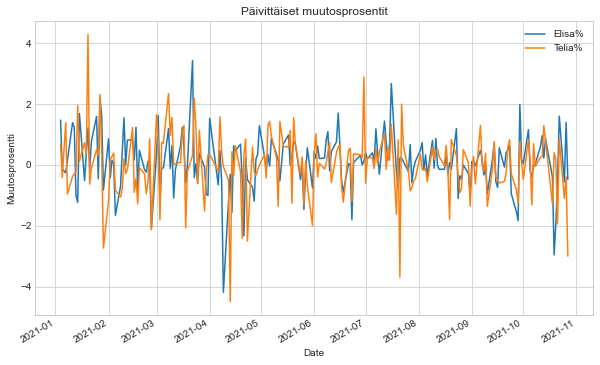

In [17]:
(muutokset['2021':]*100).plot(figsize = (10, 6))

plt.title('Päivittäiset muutosprosentit')
plt.ylabel('Muutosprosentti')

In [18]:
# Tunnuslukuja muutosprosenteille
(muutokset*100).describe().round(2)

,Elisa%,Telia%
count,1715.00,1715.00
mean,0.06,-0.02
std,1.45,1.40
min,-9.22,-13.45
25%,-0.61,-0.68
50%,0.08,0.00
75%,0.77,0.73
max,16.40,11.00


In [19]:
# Päivät, jolloin muutosprosentti ollut suurempi kuin 6 %
muutokset[(abs(muutokset['Elisa%']) > 0.06) | (abs(muutokset['Telia%']) > 0.06)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-08-25,0.065693,0.047335
2015-09-25,0.061796,0.025510
2016-06-27,-0.046049,-0.079728
2018-04-20,-0.001125,0.083107
2018-07-13,-0.092226,-0.009455
2018-10-18,-0.074751,-0.000496
2019-04-04,-0.063350,-0.007843


<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [20]:
# Viikonpäivät omaan sarakkeeseen (0 = maanantai)
muutokset['Weekday'] = muutokset.index.weekday

(muutokset*100).groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,342.0,0.152895,1.292185,-5.517243,-0.484764,0.108451,0.830050,5.780507
100,348.0,0.098496,1.551166,-3.897637,-0.685265,0.031473,0.748713,16.401613
200,349.0,0.090453,1.300847,-5.389870,-0.560051,0.035920,0.808124,5.965581
300,342.0,-0.000319,1.500942,-8.407721,-0.671695,0.057012,0.725981,6.875676
400,334.0,-0.042100,1.595463,-9.222597,-0.595358,0.103434,0.748448,6.179581


In [21]:
(muutokset*100).groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,342.0,-0.007392,1.412157,-7.972772,-0.681594,-0.049428,0.732898,4.142419
100,348.0,0.070157,1.420775,-4.626798,-0.634774,0.000000,0.684697,10.997615
200,349.0,0.010393,1.264335,-6.196316,-0.609313,0.000000,0.802610,4.281607
300,342.0,-0.125086,1.546276,-13.449943,-0.754598,0.000000,0.667215,5.101370
400,334.0,-0.028058,1.366193,-6.633252,-0.702445,0.000000,0.713990,8.310701


<h2>Muutosprosenttien välinen korrelaatio</h2>

In [22]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.drop('Weekday', axis = 1).corr()

,Elisa%,Telia%
Elisa%,1.000000,0.485929
Telia%,0.485929,1.000000


Text(0.5, 1.0, 'Elisan ja Telian päivämuutosten hajontakaavio')

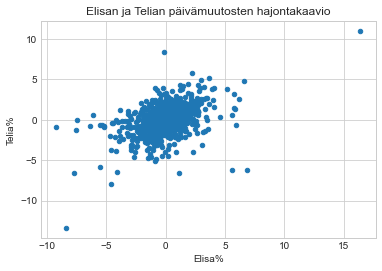

In [23]:
(muutokset*100).plot.scatter(x = 'Elisa%', y = 'Telia%')
plt.title('Elisan ja Telian päivämuutosten hajontakaavio')

Text(0.5, 1.0, 'Päivämuutosten 100 päivän liukuva korrelaatio')

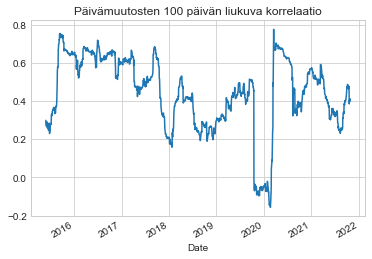

In [24]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()
plt.title('Päivämuutosten 100 päivän liukuva korrelaatio')

<h2>Liukuva volatiliteetti</h2>

Volatiliteetti kuvaa osakkeeseen liittyvää riskiä.

Volatiliteetti voidaan laska päivittäisten muutosprosenttien keskihajontana ( std() ) ja se skaaltaaan vuositasolle kertomalla vuoden kaupantekopäivien lukumäärän neliöjuurella (sama kuin korotus potenssiin 0.5). Vuoteen sisältyvien kaupantekopäivien lukumäärä vaihtelee vuodesta toiseen. Tässä käytetty lukumäärää 252.

Liukuva volatiliteetti kuvaa, miten volatiliteetti (riski) on muuttunut ajan kuluessa.

Text(0.5, 1.0, 'Elisan ja Telian liukuva volatiliteetti')

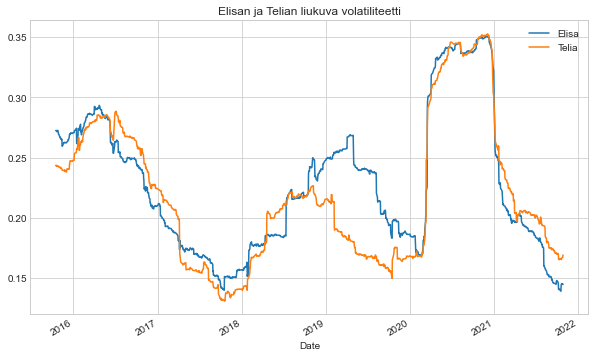

In [25]:
# 200 päivän liukuva volatiliteetti
plt.figure(figsize = (10, 6))
(muutokset['Elisa%'].rolling(200).std() * (252**0.5)).plot(label = 'Elisa', legend = True)
(muutokset['Telia%'].rolling(200).std() * (252**0.5)).plot(label = 'Telia', legend = True)
plt.title('Elisan ja Telian liukuva volatiliteetti')

<h2>Kahden arvoakselin viivakaavio</h2>

Elisan ja Telian päätöshinnat ovat eri suuruusluokkaa. Jos haluan kuvata ne päällekkäin samaan kaavioon, niin voin käyttää kahden arvoakselin kaaviota.

'C0' tarkoittaa käytössä olevan väripaletin ensimmäistä väriä ja 'C1' toista väriä.

Text(0.5, 1.0, 'Elisan ja Telian osakkeiden hinnan kehitys')

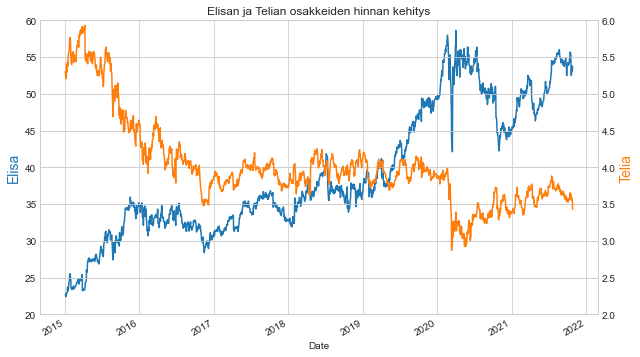

In [26]:
plt.figure(figsize = (10, 6))

# Viivakaavio Elisan päätöshinnoista
eli = elisa['Close'].plot(color = 'C0')

# Elisan nimi, väri ja fonttikoko
plt.ylabel('Elisa', color = 'C0', fontsize = 14)

# Elisan arvoakselin skaalaus
plt.ylim(20, 60)

# Luon Telialle kaavion (tel), jolla on yhteinen x-akseli eli-kaavion kanssa
tel = eli.twinx()

# Viivakaavio Telian päätöshinnoista
telia['Close'].plot(ax = tel, color = 'C1')

# Telian nimi, väri ja fonttikoko
plt.ylabel('Telia', color = 'C1', fontsize = 14)

# Telian arvoakselin skaalaus
plt.ylim(2, 6)

plt.title('Elisan ja Telian osakkeiden hinnan kehitys')

<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/